In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
import matplotlib.pyplot as plt
%matplotlib inline
df = df.loc[df['continent'] == "Africa"]
len(df['location'].unique())

56

In [2]:
len(df['male_smokers'].unique())

35

In [3]:
df['male_smokers'] = df['male_smokers'].fillna(0)
df = df.loc[df['male_smokers'] != 0]
len(df['male_smokers'].unique())

34

In [4]:
data_ms = df.groupby(['location']).mean()['male_smokers']
data_fms = df.groupby(['location']).mean()['female_smokers']
data_index = df.groupby(['location']).mean()['human_development_index']
data_poverty = df.groupby(['location']).mean()['extreme_poverty']
data_65 = df.groupby(['location']).mean()['aged_65_older']
data_70 = df.groupby(['location']).mean()['aged_70_older']
data_diabet = df.groupby(['location']).mean()['diabetes_prevalence']
data_hand = df.groupby(['location']).mean()['handwashing_facilities']
data_hospital = df.groupby(['location']).mean()['hospital_beds_per_thousand']
data_life= df.groupby(['location']).mean()['life_expectancy'] 
data_gdp = df.groupby(['location']).mean()['gdp_per_capita']
df['new'] = df['total_deaths']/df['population']
data_death = df.groupby(['location']).max()['new']


/tmp/ipykernel_7287/3804709895.py:13: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data_death = df.groupby(['location']).max()['new']


In [5]:
data = pd.DataFrame({'female_smokers': data_fms, 'male_smokers': data_ms,'total_deaths' : data_death, 
        'human_development_index' : data_index, 'extreme_poverty' : data_poverty,'diabetes_prevalence': data_diabet, 'aged_65_older' : data_65
                    ,'aged_70_older' : data_70, 'hospital_beds_per_thousand' : data_hospital, 'handwashing_facilities': data_hand
                    ,'life_expectancy' : data_life, 'gdp_per_capita' : data_gdp}).reset_index()
data.isnull().sum()

location                      0
female_smokers                0
male_smokers                  0
total_deaths                  0
human_development_index       0
extreme_poverty               6
diabetes_prevalence           0
aged_65_older                 0
aged_70_older                 0
hospital_beds_per_thousand    7
handwashing_facilities        7
life_expectancy               0
gdp_per_capita                0
dtype: int64

In [6]:
data.dropna(subset=['handwashing_facilities'], inplace=True)
data.isnull().sum()

location                      0
female_smokers                0
male_smokers                  0
total_deaths                  0
human_development_index       0
extreme_poverty               3
diabetes_prevalence           0
aged_65_older                 0
aged_70_older                 0
hospital_beds_per_thousand    7
handwashing_facilities        0
life_expectancy               0
gdp_per_capita                0
dtype: int64

In [7]:
data.dropna(subset=['extreme_poverty'], inplace=True)
data.isnull().sum()

location                      0
female_smokers                0
male_smokers                  0
total_deaths                  0
human_development_index       0
extreme_poverty               0
diabetes_prevalence           0
aged_65_older                 0
aged_70_older                 0
hospital_beds_per_thousand    6
handwashing_facilities        0
life_expectancy               0
gdp_per_capita                0
dtype: int64

coefficient of determination: 0.48684634674860605


<function matplotlib.pyplot.savefig(*args, **kwargs)>

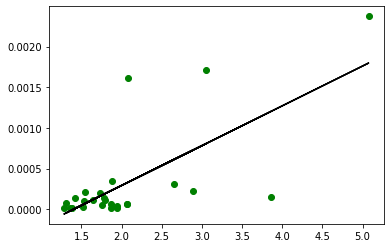

In [8]:
from sklearn.linear_model import LinearRegression
x3 = data['aged_70_older'].values.reshape((-1,1))
y3 = data['total_deaths'].values
model = LinearRegression()
model.fit(x3, y3)
r_sq = model.score(x3, y3)
print('coefficient of determination:', r_sq)
plt.scatter(x3, y3,color = 'green')
plt.plot(x3, model.predict(x3), color='black')
plt.savefig

In [9]:
data['human_development_index'] = data['human_development_index']*100
x4 = data[['aged_70_older', 'human_development_index','extreme_poverty','diabetes_prevalence','male_smokers','handwashing_facilities',
           'female_smokers']]
y4 = data['total_deaths']*10000
data

,location,female_smokers,male_smokers,total_deaths,human_development_index,extreme_poverty,diabetes_prevalence,aged_65_older,aged_70_older,hospital_beds_per_thousand,handwashing_facilities,life_expectancy,gdp_per_capita
0,Algeria,0.7,30.4,0.000156,74.8,0.5,6.73,6.211,3.857,1.90,83.741,76.88,13913.839
1,Benin,0.6,12.3,0.000013,54.5,49.6,0.99,3.244,1.942,0.50,11.035,61.77,2064.236
3,Burkina Faso,1.6,23.9,0.000018,45.2,43.7,2.42,2.409,1.358,0.40,11.877,61.58,1703.102
5,Comoros,4.4,23.6,0.000196,55.4,18.1,11.88,2.963,1.726,2.20,15.574,64.32,1413.890
6,Congo,1.7,52.3,0.000066,57.4,37.0,7.20,3.402,2.063,NaN,47.964,64.57,4881.406
8,Egypt,0.2,50.1,0.000227,70.7,1.3,17.31,5.159,2.891,1.60,89.827,71.99,10550.206
11,Ethiopia,0.4,8.5,0.000063,48.5,26.7,7.47,3.526,2.063,0.30,7.960,66.60,1729.927
12,Gambia,0.7,31.2,0.000139,49.6,10.1,1.91,2.339,1.417,1.10,7.876,62.05,1561.767
13,Ghana,0.3,7.7,0.000044,61.1,12.0,4.97,3.385,1.948,0.90,41.047,64.07,4227.630
14,Kenya,1.2,20.4,0.000107,60.1,36.8,2.92,2.686,1.528,1.40,24.651,66.70,2993.028


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x4_train, y4_train)
coeff_df = pd.DataFrame(regressor.coef_, x4.columns, columns=['Coefficient'])
coeff_df


,Coefficient
aged_70_older,5.500176
human_development_index,0.146653
extreme_poverty,-0.091020
diabetes_prevalence,-0.269628
male_smokers,0.061775
handwashing_facilities,-0.133046
female_smokers,0.752483


In [11]:
y_pred = regressor.predict(x4_test)
end = pd.DataFrame({'Actual': y4_test, 'Predicted': y_pred})
end

,Actual,Predicted
3,0.175108,-1.692302
30,0.132257,-2.461927
22,16.093901,9.877196
26,1.177954,-0.433452
8,2.267482,0.517710
16,0.566101,2.360179


In [12]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(x4_test)
r2_score(y4_test,y_pred)

0.7060967802291052

/home/olya/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/olya/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


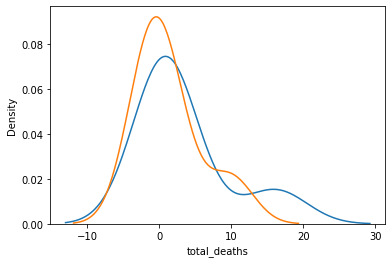

In [13]:
import seaborn as sns
g = sns.distplot(y4_test,hist = False)
g = sns.distplot(y_pred, hist = False)

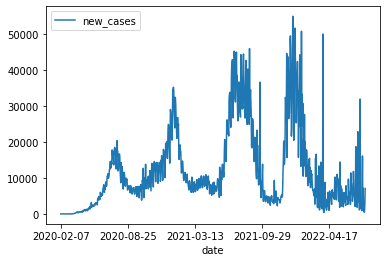

In [14]:
cases = df.groupby(['date']).sum()['new_cases'].reset_index()
cases.columns =['date', 'new_cases']
cases.plot(x = 'date', y = 'new_cases')
plt.show()

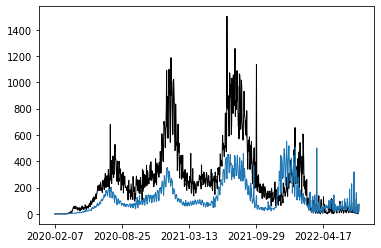

In [16]:
import matplotlib.ticker as ticker
new_death = df.groupby(['date']).sum()['new_deaths'].reset_index()
new_death.columns =['date', 'new_deaths']
x = cases['date']
y1 = cases['new_cases']/100
y2 = new_death['new_deaths']
fig, ax = plt.subplots()


ax.plot(x, y2, color = 'black', linewidth = 1)
ax.plot(x, y1,  linewidth = 1)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))


fig.set_figwidth(6)
fig.set_figheight(4)

plt.savefig('afc.png')